# San Diego On-Sale Alcohol Permits

A map of the density of On-Sale alcohol permits, the permits required for serving alcohol at a bar or restaurant. 

One of the [recent datasets in our data repository](https://data.sandiegodata.org/dataset/abc-ca-gov-licenses/) is for alcohol permit from the California Alcoholic Beverage Control Board. This analysis presents a map of the tracts with the higest density of On-Sale permits, in permits per square kilometer. On-sale permits are for alcohol sales that will be consumed on premises, primarily bars and restaurants

In [1]:
import seaborn as sns
import metapack as mp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display 
import contextily as ctx

%matplotlib inline
sns.set_context('notebook')
mp.jupyter.init()


In [2]:
pkg = mp.jupyter.open_package()
#pkg = mp.jupyter.open_source_package()
#pkg

In [3]:
pkg.resource('ca_abc_licenses').dataframe()

,license_type,file_number,lic_or_app,type_status,type_orig_iss_date,expir_date,fee_codes,dup_counts,master_ind,term_in_of_months,...,dba_name,mail_addr_1,mail_addr_2,mail_city,mail_state,mail_zip,prem_county,prem_census_tract,county,tract
0,20,257948,APP,ACTIVE,,,P40,,Y,12,...,CIRCLE K 457,15825 MOJAVE DR,,VICTORVILLE,CA,92394,RIVERSIDE,0451.20,65,14000US06065045120
1,21,446537,APP,ACTIVE,,,P40,,Y,12,...,CIRCLE K 6004,15825 MOJAVE DR,,VICTORVILLE,CA,92394,MONTEREY,0106.04,53,14000US06053010604
2,20,515667,APP,ACTIVE,,,P40,,Y,12,...,CIRCLE K 9476,15825 MOJAVE DR,,VICTORVILLE,CA,92394,SAN DIEGO,0170.43,73,14000US06073017043
3,20,203684,APP,ACTIVE,,,P20,,Y,12,...,CIRCLE K 8587,15825 MOJAVE DR,,VICTORVILLE,CA,92394,LOS ANGELES,4003.04,37,14000US06037400304
4,20,165239,APP,ACTIVE,,,P0,,Y,12,...,CIRCLE K 3608,15825 MOJAVE DR,,VICTORVILLE,CA,92394,FRESNO,0082.00,19,14000US06019008200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122076,21,621003,APP,PEND,,,,,Y,12,...,,22 MICHAEL RD,,LADERA RANCH,CA,92694,,,<NA>,NaN
122077,47,621006,APP,PEND,,,,,Y,12,...,,39626 10TH ST WEST,SUITE F,PALMDALE,CA,93551,,,<NA>,NaN
122078,47,621005,APP,PEND,,,,,Y,12,...,,1626 N WILCOX,#185,LOS ANGELES,CA,90028-6206,,,<NA>,NaN
122079,47,621011,APP,PEND,,,,,Y,12,...,,1626 N WILCOX,#185,LOS ANGELES,CA,90028-6206,,,<NA>,NaN


In [4]:
abc = pkg.resource('ca_abc_licenses').dataframe()

# Mark permits for being generall onsale or offsale

abc['onsale'] = abc.license_type.isin([41,47,48])
abc['offsale'] = abc.license_type.isin([20,21])
abc['on_off'] = 'na'
abc.loc[abc['onsale'],'on_off'] = 'onsale'
abc.loc[abc['offsale'],'on_off'] = 'offsale'

# Onsale and offsale counts
oo_count = abc.groupby(['tract','on_off']).license_type.count().unstack().fillna(0)


In [5]:
demo = mp.open_package('http://library.metatab.org/sandiegodata.org-demographics-tract-1.1.1.csv')
tracts = demo.resource('tracts').geoframe()
sd_tracts = tracts[tracts.countyfp==73]
sd_tracts

,statefp,countyfp,tractce,geoid,name,namelsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
0,6,73,8331,14000US06073008331,83.31,Census Tract 83.31,G5020,S,954205,0,32.942604,-117.224106,"POLYGON ((-117.23082 32.94176, -117.23079 32.9..."
1,6,73,8336,14000US06073008336,83.36,Census Tract 83.36,G5020,S,828562,0,32.967841,-117.133158,"POLYGON ((-117.13793 32.96927, -117.13792 32.9..."
2,6,73,8337,14000US06073008337,83.37,Census Tract 83.37,G5020,S,1566257,0,32.958394,-117.135787,"POLYGON ((-117.14630 32.95554, -117.14625 32.9..."
3,6,73,11601,14000US06073011601,116.01,Census Tract 116.01,G5020,S,733715,0,32.666331,-117.096401,"POLYGON ((-117.10356 32.66720, -117.10314 32.6..."
4,6,73,11602,14000US06073011602,116.02,Census Tract 116.02,G5020,S,1006599,14299,32.659990,-117.094173,"POLYGON ((-117.10154 32.66203, -117.10133 32.6..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
623,6,73,20214,14000US06073020214,202.14,Census Tract 202.14,G5020,S,1751495,0,33.127011,-117.084424,"POLYGON ((-117.09313 33.13176, -117.09306 33.1..."
624,6,73,202,14000US06073000202,2.02,Census Tract 2.02,G5020,S,1306000,0,32.745395,-117.175154,"POLYGON ((-117.18404 32.74571, -117.18383 32.7..."
625,6,73,2712,14000US06073002712,27.12,Census Tract 27.12,G5020,S,2194501,0,32.729763,-117.073217,"POLYGON ((-117.08495 32.72367, -117.08476 32.7..."
626,6,73,3305,14000US06073003305,33.05,Census Tract 33.05,G5020,S,1289458,0,32.697883,-117.090067,"POLYGON ((-117.09511 32.70413, -117.09492 32.7..."


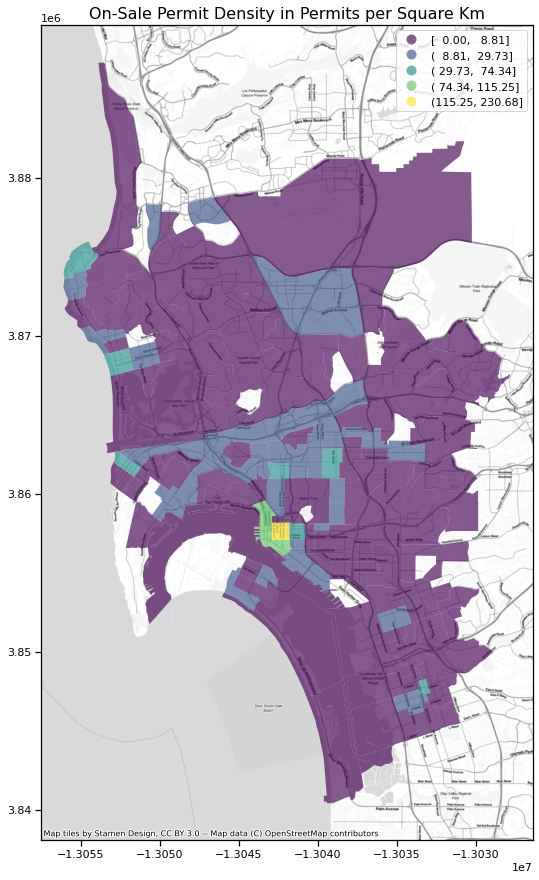

In [6]:
# Merge to SD tracts
t = sd_tracts.merge(oo_count, left_on='geoid', right_index=True)[['geoid','geometry','aland','offsale','onsale']]

# Compute densities
t.loc[:,['offsale_den','onsale_den']] = 0 

# Per square kilometer
t['offsale_den'] = (t['offsale']/(t.aland/1e6))
t['onsale_den'] = (t['onsale']/(t.aland/1e6))


# Select the geographic are with the 10 highest onsale densities
hull = t.sort_values('onsale_den', ascending=False).iloc[:10,:].unary_union.convex_hull.buffer(.01)
# Turn it into a bounding box
bb = hull.bounds

# Index to the tracts that are within the bounds
t = t.cx[bb[0]:bb[2],bb[1]:bb[3]]

fig, ax = plt.subplots(1, figsize=(15,15) )
t.to_crs(epsg=3857).plot(column='onsale_den', scheme='fisher_jenks',  alpha=0.65, ax=ax, legend=True)
ctx.add_basemap(ax, zoom=13, source=ctx.providers.Stamen.TonerLite)
ax.set_title('On-Sale Permit Density in Permits per Square Km', fontsize=16);
fig.savefig('../doc/OnsaleDensity.png')
t.to_csv('../data/on_off_density.csv')

To anyone who has lived in San Diego, this map isn't a surprise: the highest densities are in Pacific Beach, Ocean Beach, Downtown, and North Park. We will be using this data to explore crime and its associatino to alcohol in our upcomming [Crime Analysis Meetup](https://www.sandiegodata.org/2020/11/getting-started-with-crime-analysis/)